In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

In [2]:
data=pd.read_csv("Customer Churn.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data['TotalCharges'] = data['TotalCharges'].replace(" ","0")

In [5]:
data['TotalCharges'] = data['TotalCharges'].astype("float")

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
data.duplicated().sum()

0

In [10]:
data["customerID"].duplicated().sum()

0

converted value of senior citizen value to yes and no instead of 0 and 1 

In [11]:
def convert(value):
    if value == 1:
        return "yes"
    else:
        return "no"

data["SeniorCitizen"]=data["SeniorCitizen"].apply(convert)

In [12]:
data.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


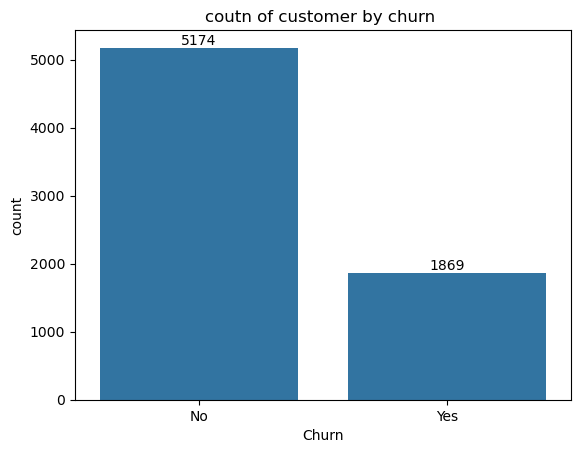

In [13]:
ax = sns.countplot(x="Churn",data=data)
ax.bar_label(ax.containers[0])
plt.title("coutn of customer by churn ")
plt.show()

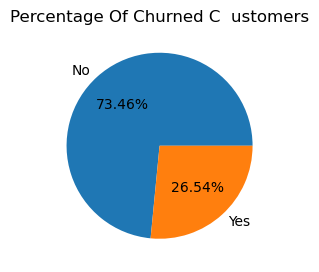

In [14]:
plt.figure(figsize=(3,4))
gb= data.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage Of Churned C  ustomers")
plt.show()

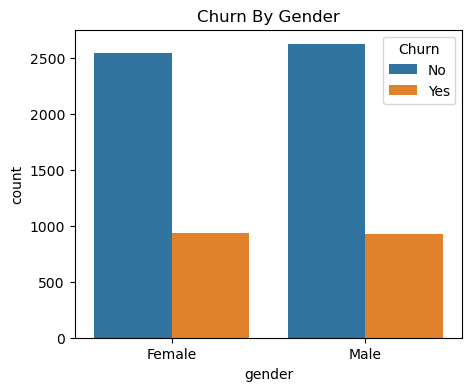

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x="gender", data = data, hue="Churn")
plt.title("Churn By Gender")
plt.show()

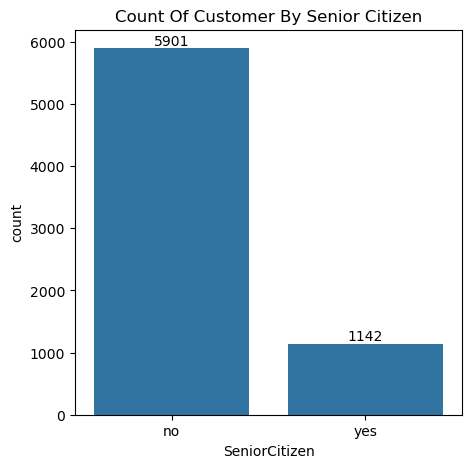

In [33]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x="SeniorCitizen", data = data)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customer By Senior Citizen")
plt.show()

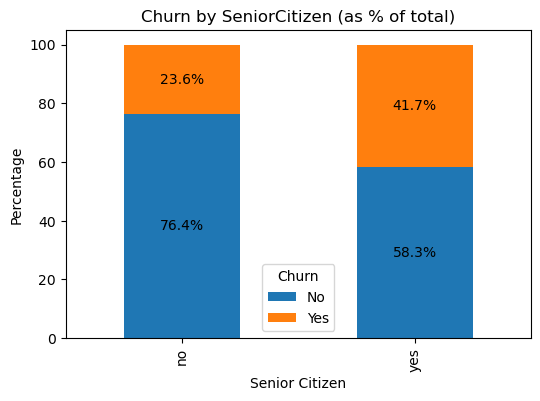

In [34]:
 ct = pd.crosstab(data["SeniorCitizen"], data["Churn"])

# normalize to get percentages
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# plot stacked bar
ax = ct_percent.plot(kind="bar", stacked=True, figsize=(6,4))

# add labels on each bar
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="center")

plt.title("Churn by SeniorCitizen (as % of total)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn")
plt.show()

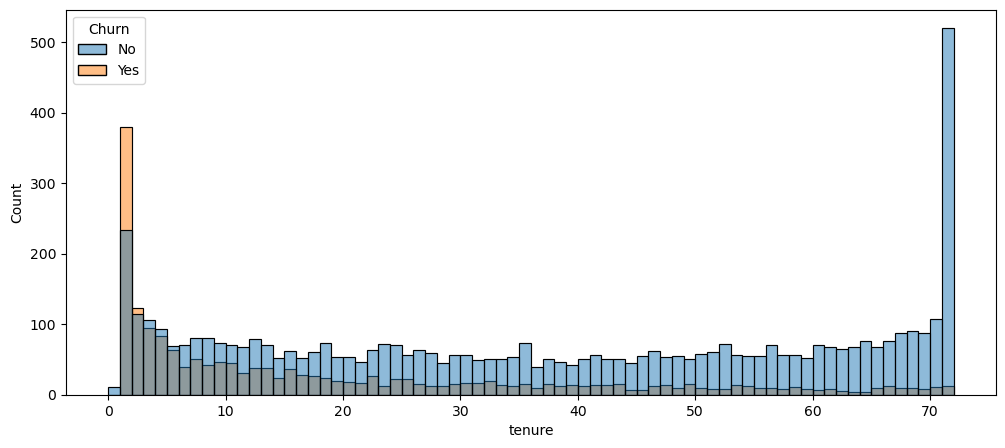

In [43]:
plt.figure(figsize=(12,5))
sns.histplot(x="tenure", data = data, bins=72, hue="Churn")
plt.show()

people who have used our services for a long time have stayed  and people who have used our services  for 1 or 2 months have churned 

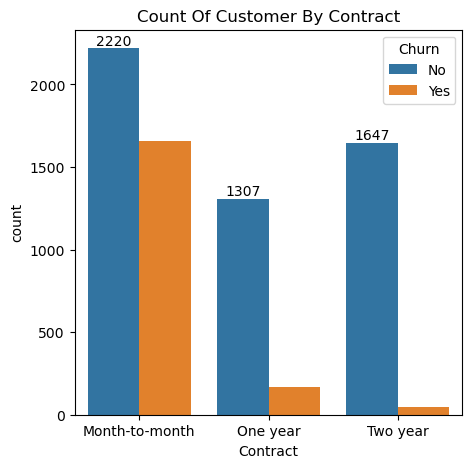

In [46]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x="Contract", data = data,hue="Churn" )
ax.bar_label(ax.containers[0])
plt.title("Count Of Customer By Contract")
plt.show()

Poeple who have one month contract are likely to churn rather than people who have one year or two year contract

In [54]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

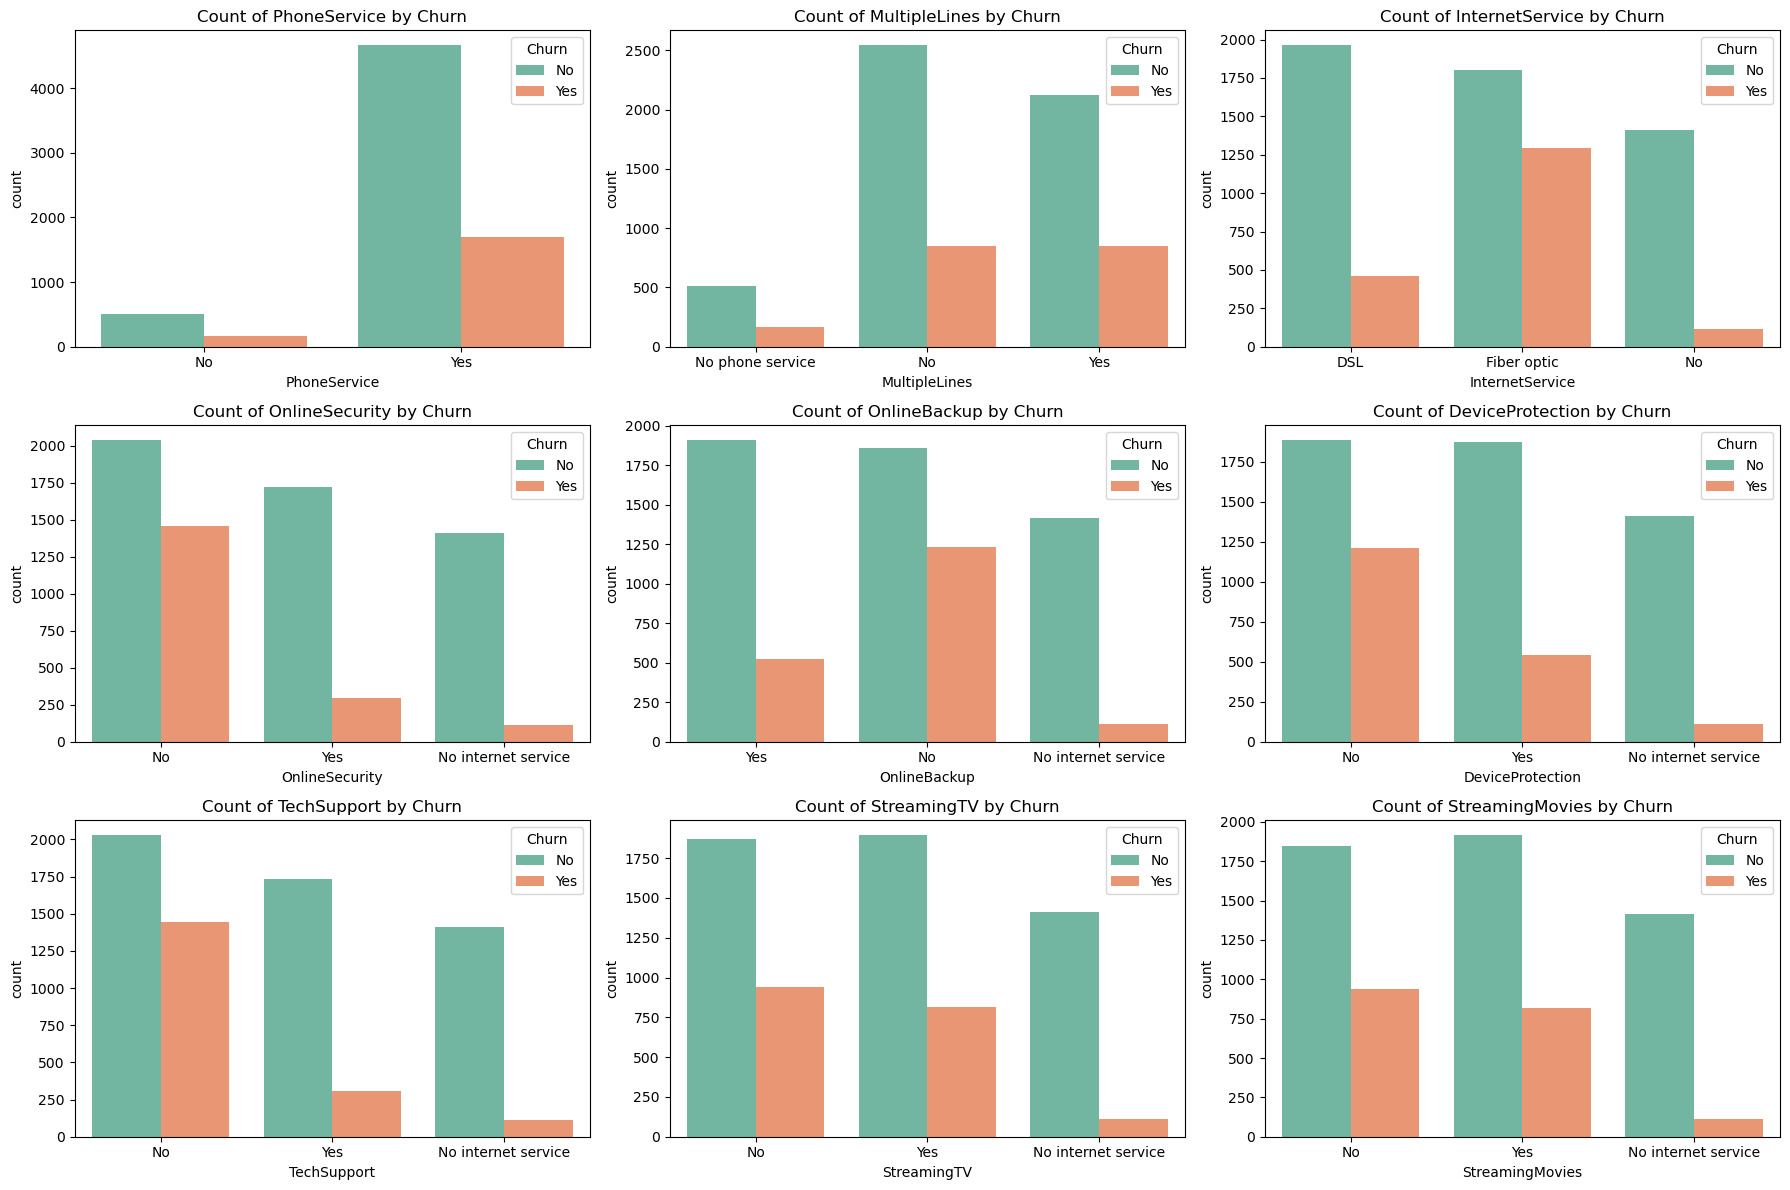

In [60]:
# select categorical columns (excluding ID and numeric ones)
categorical_cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
]

# define subplot grid
n_cols = 3
n_rows = -(-len(categorical_cols) // n_cols)  # ceiling division

plt.figure(figsize=(18, n_rows*4))

for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(data=data, x=col, hue="Churn", palette="Set2")
    plt.title(f"Count of {col} by Churn")
    plt.xticks()

plt.tight_layout()
plt.show()


The analysis shows that customers with fiber optic internet service, and those without online security, backup, device protection, or tech support, have a higher churn rate compared to others. Customers with additional services like streaming (TV/movies) also show noticeable churn, though less extreme. Overall, lack of value-added services and reliance on fiber optic internet seem strongly linked to customer churn.

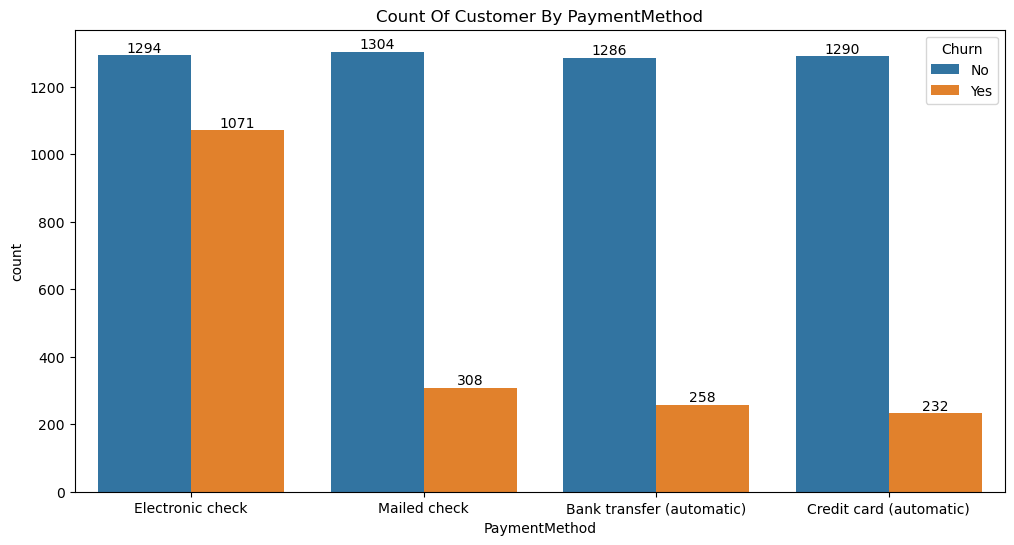

In [68]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x="PaymentMethod", data = data,hue="Churn" )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count Of Customer By PaymentMethod")
plt.show()

Customer is likely to churn when using electronic check as payment method 